In [1]:
from colossus.cosmology import cosmology
cosmo = cosmology.setCosmology("planck18")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp2d, interp1d
import sys
sys.path.insert(0, "../D-STEEL/dsteel")
import halo_growth


def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

path="/Users/chris/data/haloConcentration/cM_planck18.txt"
df = pd.read_csv(path, comment='#', sep='\s+')
z_array = df['z']
M200c = df['M200c']
c200c = df['c200c']

M200cl = np.log10(M200c)

In [2]:
def getCold(m, z):
    z = find_nearest(np.unique(z_array), z)
    m2c = interp1d(np.log10(M200c[z_array==z]), c200c[z_array==z])
    return m2c(m)

def getCnew(m, z):
    getC = interp2d(z_array, np.log10(M200c), c200c)
    return getC(z, m)

def getCmeta(m, z, width = 0.1):
    mask = (M200cl > m-width/2 ) & (M200cl < m+width/2)
    zs = z_array[mask]
    uniquez = np.unique(zs)
    meanC = np.zeros_like(uniquez)
    for i, zi in enumerate(uniquez):
        meanC[i] = np.mean(c200c[mask & (z_array == zi)])
    z2c = interp1d(uniquez, meanC, kind = 'quadratic')
    return z2c(z)
        
        

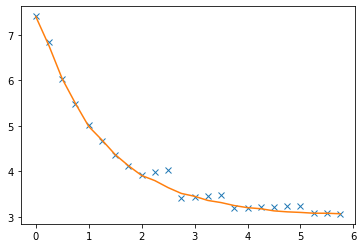

In [3]:
m = [12.267224,   12.20857123, 12.1378665,  12.0606479,  11.98048259, 11.89880288,
 11.81610567, 11.73385188, 11.65220462, 11.57089052, 11.4908133,  11.41186558,
 11.33358755, 11.25655926, 11.1808664,  11.10590293, 11.03189689, 10.95942312,
 10.8876618,  10.81659862, 10.74695516, 10.67815561, 10.60999983, 10.54266154]
z_range = [0., 0.25, 0.5,  0.75, 1., 1.25, 1.5,  1.75, 2.,   2.25, 2.5,  2.75, 3.,   3.25,
 3.5,  3.75, 4.,   4.25, 4.5,  4.75, 5.,   5.25, 5.5,  5.75]

c_old = np.zeros_like(z_range)
c_meta = np.zeros_like(z_range)

for i, z in enumerate(z_range):
    c_old[i] = getCold(m[i], z)
    c_meta[i] = getCmeta(m[i], z, width = .5)
    
plt.figure()
plt.plot(z_range, c_old, 'x')
#plt.plot(z_range, c_new, 'x')
plt.plot(z_range, c_meta )



[-4.41276515e-05  4.73211769e-03  9.54227315e-03  1.43867555e-02
  1.92659869e-02  2.41803947e-02  2.91304117e-02  3.41164763e-02
  3.91390324e-02  4.41985296e-02  4.92954231e-02  5.44301742e-02
  5.96032498e-02  6.48151231e-02  7.00662730e-02  7.53571850e-02
  8.06883505e-02  8.60602674e-02  9.14734401e-02  9.69283794e-02
  1.02425603e-01  1.07965635e-01  1.13549006e-01  1.19176255e-01
  1.24847926e-01  1.30564572e-01  1.36326752e-01  1.42135074e-01
  1.47990317e-01  1.53893317e-01  1.59844924e-01  1.65845997e-01
  1.71897413e-01  1.78000059e-01  1.84154839e-01  1.90362668e-01
  1.96624478e-01  2.02941213e-01  2.09313834e-01  2.15743317e-01
  2.22230651e-01  2.28776845e-01  2.35382919e-01  2.42049914e-01
  2.48778884e-01  2.55570902e-01  2.62427056e-01  2.69348455e-01
  2.76336223e-01  2.83391503e-01  2.90515457e-01  2.97709265e-01
  3.04974128e-01  3.12311264e-01  3.19721914e-01  3.27207338e-01
  3.34768816e-01  3.42407651e-01  3.50125166e-01  3.57922707e-01
  3.65801644e-01  3.73763

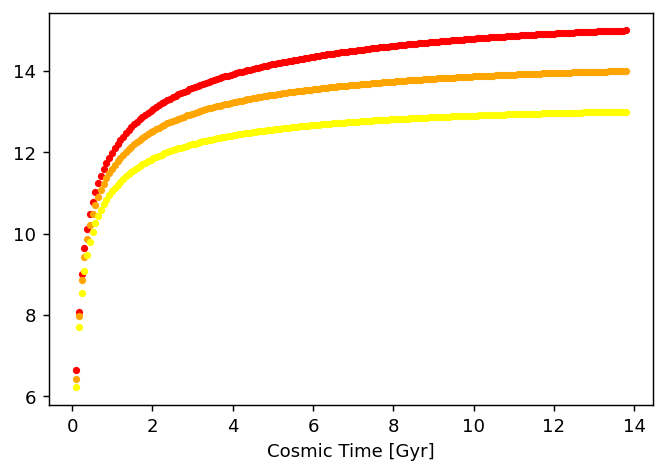

In [24]:
plt.figure(dpi=130)

masses = [15, 14, 13]
colours = ['red', 'orange', 'yellow']

steps = 200
t_range = np.linspace(cosmo.age(0), 0.1, steps)
z_range = cosmo.age(t_range, inverse=True)

print(z_range)

var = cosmo.age(0)
print("z=0 ->", var )
print("This converted back to z: ", cosmo.age(var, inverse=True))

for i, mass in enumerate(masses):
    track = halo_growth.Mass_acc_history_VDB_FS(mass, z_range, cosmo.h, cosmo.Om0)
    plt.plot(t_range, track, '.', color = colours[i])
    
plt.xlabel("Cosmic Time [Gyr]")
plt.ylabel("")    
plt.show()